In [1]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

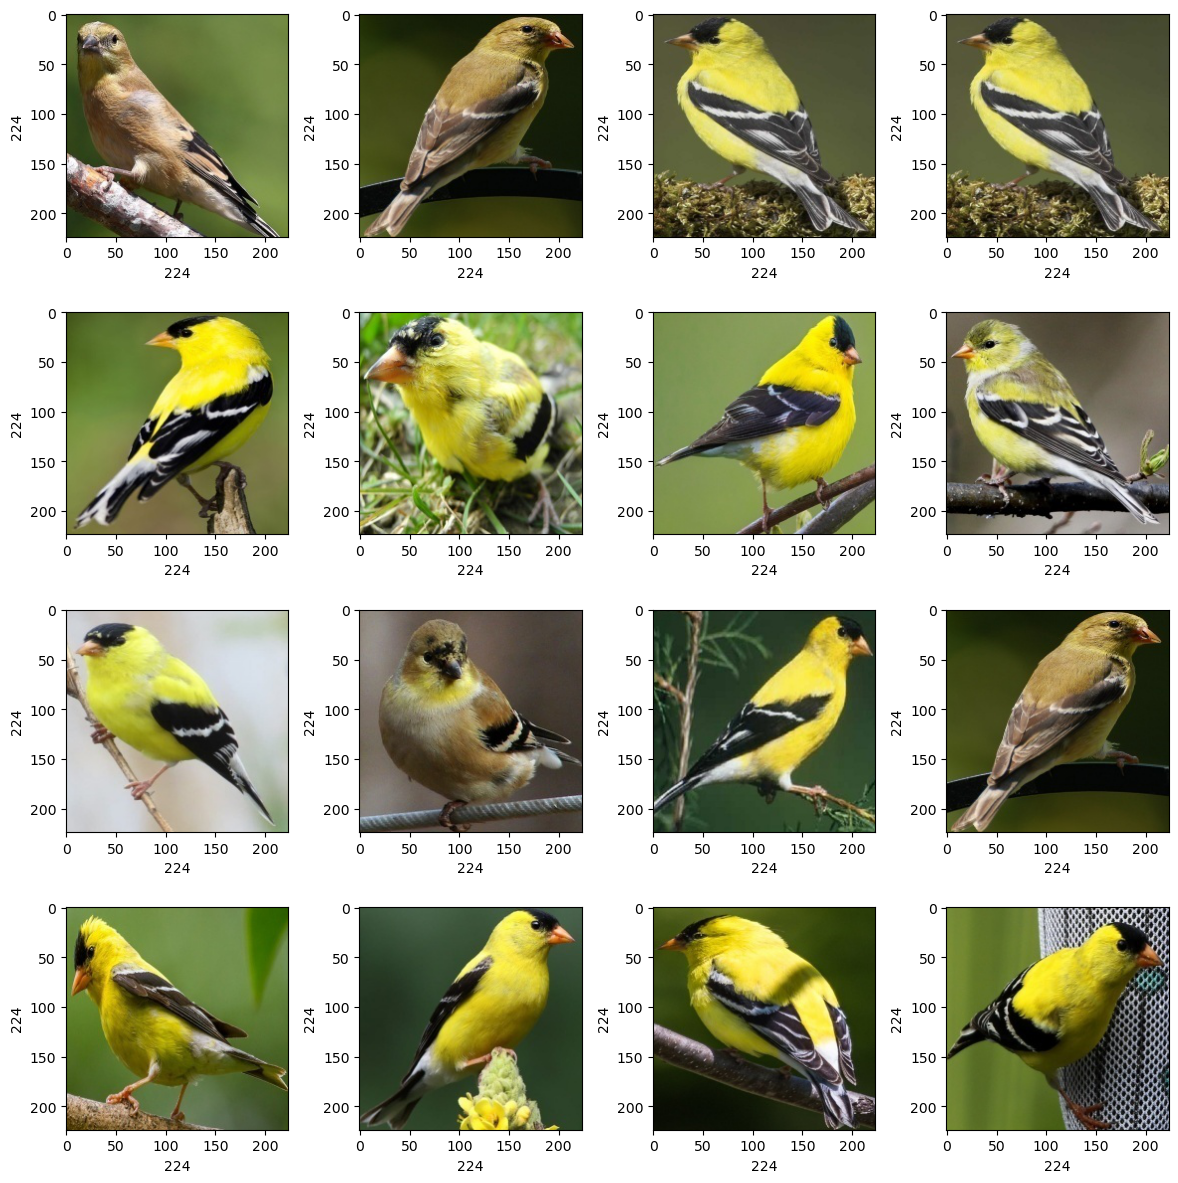

In [2]:
# Plotting 12 images to check datasets
plt.figure(figsize=(12,12))
path = r"C:\Users\USER\Python Files\Data\Bird Speciees Dataset\AMERICAN GOLDFINCH"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [3]:
# Setting path and creating empty list
dir = r"C:\Users\USER\Python Files\Data\Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [4]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [5]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    44
BARN OWL              44
CARMINE BEE-EATER     44
DOWNY WOODPECKER      44
EMPEROR PENGUIN       44
FLAMINGO              44
dtype: int64

In [6]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

6

In [7]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

In [8]:
# Checking labels shape 
label_list = np.array(label_list)
label_list.shape

(264,)

In [9]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [10]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

In [11]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [12]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [13]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [14]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [15]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
2/2 [==============================] - 11s 3s/step - loss: 1.8345 - accuracy: 0.1310 - val_loss: 1.6857 - val_accuracy: 0.3023
Epoch 2/50
2/2 [==============================] - 1s 460ms/step - loss: 1.7614 - accuracy: 0.2143 - val_loss: 1.6924 - val_accuracy: 0.4186
Epoch 3/50
2/2 [==============================] - 1s 491ms/step - loss: 1.7081 - accuracy: 0.3274 - val_loss: 1.6495 - val_accuracy: 0.4419
Epoch 4/50
2/2 [==============================] - 1s 490ms/step - loss: 1.6629 - accuracy: 0.4107 - val_loss: 1.5663 - val_accuracy: 0.4419
Epoch 5/50
2/2 [==============================] - 1s 496ms/step - loss: 1.6024 - accuracy: 0.3750 - val_loss: 1.5269 - val_accuracy: 0.5814
Epoch 6/50
2/2 [==============================] - 1s 488ms/step - loss: 1.5325 - accuracy: 0.5238 - val_loss: 1.4907 - val_accuracy: 0.5814
Epoch 7/50
2/2 [==============================] - 1s 447ms/step - loss: 1.4776 - accuracy: 0.4762 - val_loss: 1.4080 - val_accuracy: 0.5349
Epoch 8/50
2/2 [======

In [16]:
# Saving model
model.save(r"C:\Users\USER\Python Files\Data\bird_species.h5")

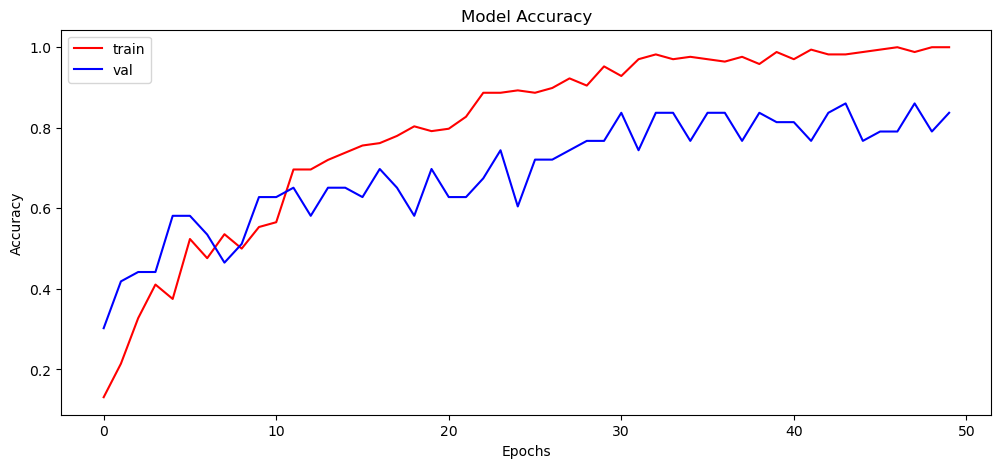

In [17]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

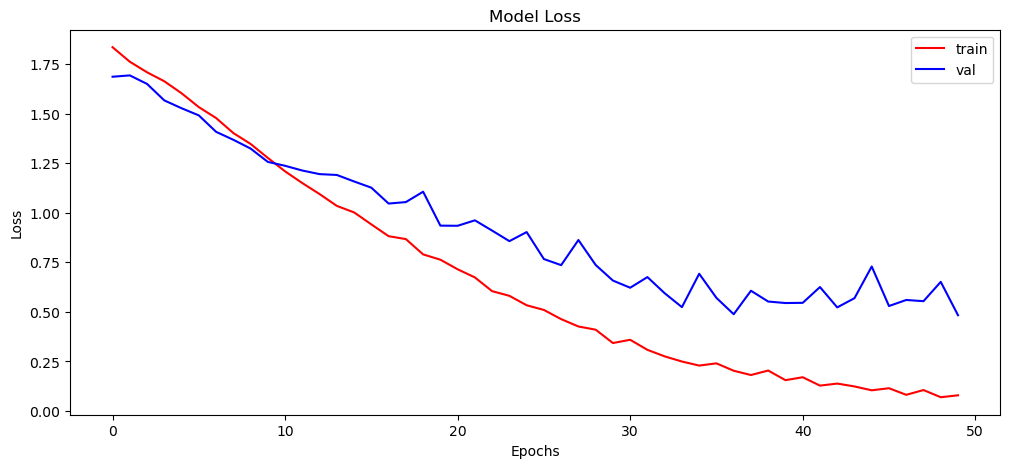

In [18]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [19]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

2/2 [==============================] - 0s 65ms/step - loss: 1.0896 - accuracy: 0.6792
Test Accuracy: 67.92452931404114


In [20]:
# Storing predictions
y_pred = model.predict(x_test)

2/2 [==============================] - 1s 55ms/step


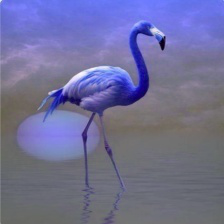

In [21]:
# Plotting image to compare
img = array_to_img(x_test[5])
img

In [22]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  FLAMINGO
Predicted :  FLAMINGO
